# Effective Graph Paper
Code to generate "Figure 2 - Edge Effectiveness"

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import tarfile
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
# Calc Gini Coefficient
def calc_gini_coef(a, epsilon=10**(-6) ):
    """Calculate the Gini coefficient of a numpy array."""
    n = np.array(a).shape[0] #number of array elements
    index = np.arange(1, (n + 1)) #index per array element
    a += epsilon #values cannot be 0
    return ((np.sum((2 * index - n  - 1) * np.sort(a))) / (n * np.sum(a))) #Gini coefficient

In [5]:
#dfB = pd.read_csv('data/BioNetworkEdgeEffectiveness.csv')
#dfBR = pd.read_csv('../Figure 2/BioNetworkRandomEnsembleEdgeEffectiveness.csv.gz', index_col=0)
# Bio networks
dfB = pd.read_csv('data/BioNetworkEffectivenessK6.tsv', sep='\t')
dfBG = pd.read_csv('data/BioNetworkEffectivenessGiniK6.tsv', sep='\t')
# BioMatched random samples
dfM = pd.read_csv('data/MatchedBioNetworkEffectivenessK6.tsv', sep='\t')
dfMG = pd.read_csv('data/MatchedBioNetworkEffectivenessGiniK6.tsv', sep='\t')

In [6]:
dfMg = dfM.groupby(['Boolean Network', 'Node', 'Input']).agg({'Input Effectiveness':['mean', 'std']})
dfMGg = dfMG.groupby(['Boolean Network', 'Node']).agg({'Input Effectiveness Gini':['mean', 'std']})

In [7]:
display(dfB)
display(dfBG)
display(dfM)
display(dfMG)
display(dfMg)
display(dfMGg)

,Boolean Network,Node,Input,Input Effectiveness
0,Mammalian Cell Cycle 2006.txt,CycA,0,0.43880
1,Mammalian Cell Cycle 2006.txt,CycA,1,0.43880
2,Mammalian Cell Cycle 2006.txt,CycA,2,0.20182
3,Mammalian Cell Cycle 2006.txt,CycA,3,0.20182
4,Mammalian Cell Cycle 2006.txt,CycA,4,0.20182
...,...,...,...,...
673,CD4 T cell signaling.txt,IL2R,1,0.16406
674,CD4 T cell signaling.txt,IL2R,2,0.00000
675,CD4 T cell signaling.txt,IL2R,3,0.16406
676,CD4 T cell signaling.txt,IL2R,4,0.35677


,Boolean Network,Node,Input Effectiveness Gini
0,Mammalian Cell Cycle 2006.txt,CycA,0.187535
1,Budding Yeast Cell Cycle,Sic1,0.000000
2,Budding Yeast Cell Cycle,"Clb1,2",0.000000
3,Arabidopsis thaliana Cell Cycle.txt,E2Fe,0.325388
4,Arabidopsis thaliana Cell Cycle.txt,SCF,0.391674
...,...,...,...
108,CD4 T cell signaling.txt,Lck,0.456622
109,CD4 T cell signaling.txt,IL2,0.163152
110,CD4 T cell signaling.txt,IL2R_HIGH,0.304471
111,CD4 T cell signaling.txt,STAT1,0.538464


,Boolean Network,Node,Sample,Input,Input Effectiveness
0,Mammalian Cell Cycle 2006.txt,CycA,0,0,0.42011
1,Mammalian Cell Cycle 2006.txt,CycA,0,1,0.52602
2,Mammalian Cell Cycle 2006.txt,CycA,0,2,0.52602
3,Mammalian Cell Cycle 2006.txt,CycA,0,3,0.51068
4,Mammalian Cell Cycle 2006.txt,CycA,0,4,0.52234
...,...,...,...,...,...
677995,CD4 T cell signaling.txt,IL2R,999,1,0.48633
677996,CD4 T cell signaling.txt,IL2R,999,2,0.52344
677997,CD4 T cell signaling.txt,IL2R,999,3,0.45521
677998,CD4 T cell signaling.txt,IL2R,999,4,0.48633


,Boolean Network,Node,Sample,Input Effectiveness Gini
0,Mammalian Cell Cycle 2006.txt,CycA,0,0.031686
1,Mammalian Cell Cycle 2006.txt,CycA,1,0.080819
2,Mammalian Cell Cycle 2006.txt,CycA,2,0.066018
3,Mammalian Cell Cycle 2006.txt,CycA,3,0.089921
4,Mammalian Cell Cycle 2006.txt,CycA,4,0.047376
...,...,...,...,...
112995,CD4 T cell signaling.txt,IL2R,995,0.051168
112996,CD4 T cell signaling.txt,IL2R,996,0.035377
112997,CD4 T cell signaling.txt,IL2R,997,0.025819
112998,CD4 T cell signaling.txt,IL2R,998,0.060419


Input Effectiveness  \
                                                                              mean   
Boolean Network                                  Node    Input                       
Arabidopsis Thaliana                             PI      0                0.723538   
                                                         1                0.716185   
                                                         2                0.717816   
                                                         3                0.717643   
                                                         4                0.717356   
...                                                                            ...   
Wg Pathway of Drosophila Signalling Pathways.txt Targets 1                0.179690   
                                                         2                0.179690   
                                                         3                0.179690   
                                                         4                0.179690   
                                                         5                0.179690   

                                                                          
                                                                     std  
Boolean Network                                  Node    Input            
Arabidopsis Thaliana                             PI      0      0.075460  
                                                         1      0.076567  
                                                         2      0.075133  
                                                         3      0.077319  
                                                         4      0.075232  
...                                                                  ...  
Wg Pathway of Drosophila Signalling Pathways.txt Targets 1      0.000000  
                                                         2      0.000000  
                                                         3      0.000000  
                                                         4      0.000000  
                                                         5      0.000000  

[678 rows x 2 columns]

Input Effectiveness Gini  \
                                                                                      mean   
Boolean Network                                    Node                                      
Arabidopsis Thaliana                               PI                             0.049630   
Arabidopsis thaliana Cell Cycle.txt                E2Fc                           0.049276   
                                                   E2Fe                           0.052960   
                                                   SCF                            0.048148   
B bronchiseptica and T retortaeformis coinfecti... IFNg_Bacterium                 0.050532   
...                                                                                    ...   
Tumour Cell Invasion and Migration.txt             SNAI2                          0.056990   
                                                   ZEB1                           0.050594   
                                                   ZEB2                           0.050098   
                                                   p63                            0.000000   
Wg Pathway of Drosophila Signalling Pathways.txt   Targets                        0.000000   

                                                                             
                                                                        std  
Boolean Network                                    Node                      
Arabidopsis Thaliana                               PI              0.018872  
Arabidopsis thaliana Cell Cycle.txt                E2Fc            0.017469  
                                                   E2Fe            0.020220  
                                                   SCF             0.018110  
B bronchiseptica and T retortaeformis coinfecti... IFNg_Bacterium  0.018086  
...                                                                     ...  
Tumour Cell Invasion and Migration.txt             SNAI2           0.023740  
                                                   ZEB1            0.018980  
                                                   ZEB2            0.019510  
                                                   p63             0.000000  
Wg Pathway of Drosophila Signalling Pathways.txt   Targets         0.000000  

[113 rows x 2 columns]

In [11]:
# Load bias.tar.gz file
bias_tarfile = tarfile.open('data/bias.tar.gz')
#
rand_edge_eff = []
rand_gini = []
for bias in range(1,33):
    print("Bias: {bias:d}".format(bias=bias))
    # Filename
    filename = 'data/bias{bias:d}.csv'.format(bias=bias)
    # Get tar member
    member = bias_tarfile.getmember(filename)
    # Extract .csv from tar
    bias_file = bias_tarfile.extractfile(member)
    # read to DataFrame
    dfb = pd.read_csv(bias_file)
    sg = dfb.apply(calc_gini_coef, axis='columns')
    #
    vals = dfb.values.flatten()
    gini = sg.values
    #
    rand_edge_eff.append(vals)
    rand_gini.append(gini)


Bias: 1
Bias: 2
Bias: 3
Bias: 4
Bias: 5
Bias: 6
Bias: 7
Bias: 8
Bias: 9
Bias: 10
Bias: 11
Bias: 12
Bias: 13
Bias: 14
Bias: 15
Bias: 16
Bias: 17
Bias: 18
Bias: 19
Bias: 20
Bias: 21
Bias: 22
Bias: 23
Bias: 24
Bias: 25
Bias: 26
Bias: 27
Bias: 28
Bias: 29
Bias: 30
Bias: 31
Bias: 32


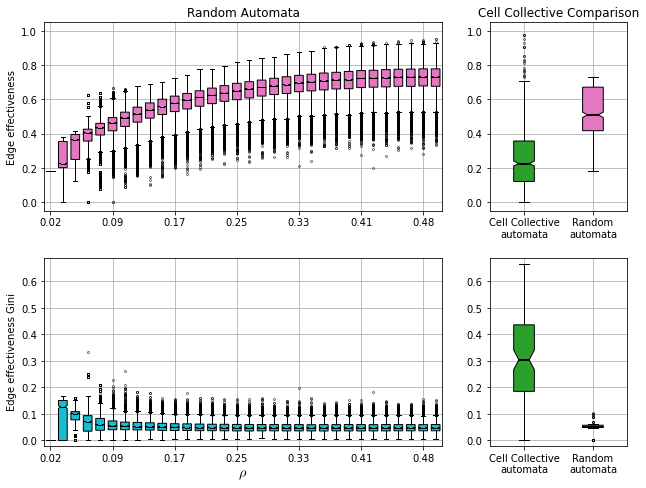

In [21]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9.5,7), sharex=False, sharey=False)
#ax1, ax2, ax3, ax4 = axes.flatten()
fig = plt.figure(constrained_layout=False, figsize=(9,7))
gs = gridspec.GridSpec(ncols=16, nrows=2, figure=fig)
s = 11
ax1 = fig.add_subplot(gs[0, 0:s])
ax2 = fig.add_subplot(gs[0, s+1:])
ax3 = fig.add_subplot(gs[1, 0:s])
ax4 = fig.add_subplot(gs[1, s+1:])

#
flierprops = dict(marker='o', markersize=2, markeredgecolor='black', markeredgewidth=.5, rasterized=True)
medianprops = dict(color='black')

# Ax1 
res1 = ax1.boxplot(rand_edge_eff, notch=True, patch_artist=True, widths=0.7,
                  flierprops=flierprops, boxprops=dict(facecolor='#e377c2'), medianprops=medianprops)
    
xticks = np.arange(1, 32, 5)
xticklables = np.round(xticks / 64, 2)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklables)
#
ax1.set_title(r"Random Automata")
ax1.set_ylabel('Edge effectiveness')
ax1.grid()
ax1.set_ylim(-0.05,1.05)

# Ax3
res3 = ax3.boxplot(rand_gini, notch=True, patch_artist=True, widths=0.7,
                 flierprops=flierprops, boxprops=dict(facecolor='#17becf'), medianprops=medianprops)

xticks = np.arange(1, 32, 5)
xticklables = np.round(xticks / 64, 2)
ax3.set_xticks(xticks)
ax3.set_xticklabels(xticklables)
#
#ax.set_title(r"Random Automata Gini")
ax3.set_ylabel('Edge effectiveness Gini')
ax3.set_xlabel(r'$\rho$', fontsize='x-large')
ax3.grid()
ax3.set_ylim(-0.02,0.69)

# Ax2
res = ax2.boxplot([dfB['Input Effectiveness'], dfMg[('Input Effectiveness','mean')]], notch=True, patch_artist=True, widths=0.3, flierprops=flierprops)

colors = ['#2ca02c', '#e377c2']
for box, median, color in zip(res['boxes'], res['medians'], colors):
    box.set_facecolor(color)
    median.set_c('k')
    median.set_lw(2)

ax2.set_xticks(range(1,3))
ax2.set_xticklabels(['Cell Collective\nautomata', 'Random\nautomata'])
ax2.set_title("Cell Collective Comparison")
ax2.grid()
ax2.set_ylim(-0.05,1.05)

# Ax4
res = ax4.boxplot([dfBG['Input Effectiveness Gini'], dfMGg[('Input Effectiveness Gini','mean')]], notch=True, patch_artist=True, widths=0.3, flierprops=flierprops)

colors = ['#2ca02c', '#17becf']
for box, median, color in zip(res['boxes'], res['medians'], colors):
    box.set_facecolor(color)
    median.set_c('k')
    median.set_lw(2)

ax4.set_xticks(range(1,3))
ax4.set_xticklabels(['Cell Collective\nautomata', 'Random\nautomata'])
ax4.grid()
ax4.set_ylim(-0.02,0.69)

plt.subplots_adjust(left=0.07, right=0.97, bottom=0.08, top=0.92, wspace=0.4, hspace=0.25)
plt.savefig("EdgeEffectivenessComposite.pdf", dpi=300)
plt.show()